# INPE Downloader - Climatology

This notebook shows the basic usage of the INPE Downloader - Climatology package.<br>
The `Climatology` module is intended to download the NETCDF files with Average and Accumulated past data<br>

The files are located at `ftp.cptec.inpe.br` (login: anonymous)

In [1]:
%load_ext autoreload
%autoreload 2

from raindownloader.inpeparser import INPE, INPETypes, INPEParsers
from raindownloader.inpedownloader import Downloader
from raindownloader.utils import FileType, DateProcessor, DateFrequency
from raindownloader.parser import *
from rainreporter.reporter import RainReporter

## Downloading Climatology

In [2]:
downloader = Downloader(server=INPE.FTPurl, parsers=INPEParsers.parsers)
downloader.data_types

[<INPETypes.DAILY_RAIN: 1>, <INPETypes.MONTHLY_ACCUM_YEARLY: 2>]

In [3]:
downloader.download_file('2002-07', '../tmp', INPETypes.MONTHLY_ACCUM_YEARLY)

PosixPath('../tmp/MERGE_CPTEC_acum_jul_2002.nc')

## Getting Climatology Cube

In [4]:
reporter = RainReporter(server=INPE.FTPurl, download_folder='../tmp', parsers=INPEParsers.parsers)

In [5]:
files = downloader.download_range(
    start_date='2001-01',
    end_date='2022-12',
    datatype=INPETypes.MONTHLY_ACCUM_YEARLY,
    local_folder='../tmp'
)

In [6]:
len(files)

264

In [9]:
cube = downloader.create_cube(files=files)

: 

: 

In [6]:
cube = reporter.get_cube('2001-01', '2022-12', datatype=INPETypes.MONTHLY_ACCUM_YEARLY)

: 

: 

In [ ]:
=20*12

## Climatology Reports

In [38]:
files = downloader.download_range('2001-02', '2001-06', local_folder='../tmp', datatype=INPETypes.MONTHLY_ACCUM_YEARLY)

In [39]:
cube = downloader.create_cube(files)

In [40]:
cube

<xarray.Dataset>
Dimensions:  (lon: 474, lat: 691, time: 5)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2001-02-01T12:00:00 ... 2001-06-01T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 70.38 68.12 70.38 67.75 ... 1.0 1.5 1.5

In [42]:
nc = xr.open_dataset(files[0])

In [43]:
nc

<xarray.Dataset>
Dimensions:  (lon: 474, lat: 691, time: 1)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2001-02-01T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 ...

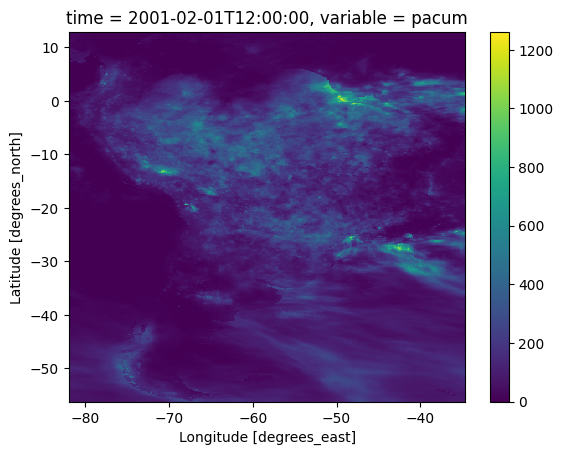

In [46]:
nc.to_array().squeeze().plot()

In [21]:
from netCDF4 import Dataset


In [22]:
Dataset?

Docstring:     
A netCDF `Dataset` is a collection of dimensions, groups, variables and
attributes. Together they describe the meaning of data and relations among
data fields stored in a netCDF file. See `Dataset.__init__` for more
details.

A list of attribute names corresponding to global netCDF attributes
defined for the `Dataset` can be obtained with the
`Dataset.ncattrs` method.
These attributes can be created by assigning to an attribute of the
`Dataset` instance. A dictionary containing all the netCDF attribute
name/value pairs is provided by the `__dict__` attribute of a
`Dataset` instance.

The following class variables are read-only and should not be
modified by the user.

**`dimensions`**: The `dimensions` dictionary maps the names of
dimensions defined for the `Group` or `Dataset` to instances of the
`Dimension` class.

**`variables`**: The `variables` dictionary maps the names of variables
defined for this `Dataset` or `Group` to instances of the
`Variable` class.

**`grou

In [16]:
Downloader.create_cube(files)

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [71]:
calendar.m

Init signature: timedelta(self, /, *args, **kwargs)
Docstring:     
Difference between two datetime values.

timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

All arguments are optional and default to 0.
Arguments may be integers or floats, and may be positive or negative.
File:           /usr/lib/python3.10/datetime.py
Type:           type
Subclasses:     _Timedelta